# Exercise Sheet for Interpolation and Approximation
----------------------------------------------------------

In [58]:
#load some python packages you will need
import numpy as np                 #this helps compute things
import matplotlib.pyplot as plt    #this helps plot things
import math
from scipy.interpolate import RegularGridInterpolator

### Enter your student ID number below, this will be used for a reproducable random number seed.

In [2]:
sid = 12314883  #  *** change this to your student number ***
seed = np.random.seed(sid)

----------------------------------------------------------

## Question 1
### a) Compute via interpolation and plot the Lagrange polynomial p(x) to $f(x) = cos(-2\pi x) + 0.4x^2$ over
### $(x_i,y_i) = [(7.2,21.04),(7.4,21.12),(7.6,22.39),(7.8,24.77]$ 

In [3]:
x = np.arange(7,8,0.001)   #dummy range for function
y = np.cos(-2*np.pi*x) +0.4*x**2  #function f(x)

xi = np.array((7.2,7.4,7.6,7.8))   # points for interpolation
yi = y[np.digitize(xi,x)]

In [4]:
def lagrange(x, xi, yi):
    N = len(xi)
    P = 0
    for j in range(N):
        Lj = 1
        delta = 1
        for m in range(N):
            if m != j:
                delta *= (xi[j] - xi[m])
                Lj *= (x - xi[m])
        P += Lj / delta * yi[j]
    return P



P = lagrange(x, xi, yi)

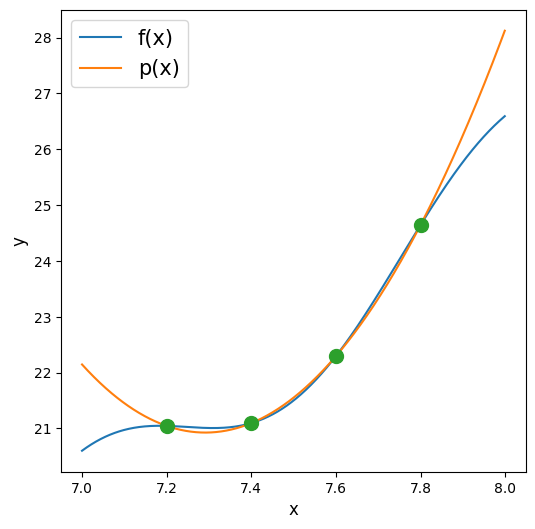

In [5]:
plt.figure(figsize=(6,6))
plt.plot(x,y,label='f(x)')  
plt.plot(x,P,label='p(x)')  
plt.plot(xi,yi,'o',markersize=10)
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.legend(loc='best',fontsize=15)

### b) Estimate the maximum absolute error bound for this Lagrange polynomial approximation over $\xi \in [x_0,x_n]$

In [6]:

# -------------------------------------------------------------
# Error analysis
# -------------------------------------------------------------
x0, xn = xi[0], xi[-1]

# Create a mask to keep only x values inside [x0, xn]
mask = (x >= x0) & (x <= xn)

x = x[mask]
y = y[mask]
P = P[mask]


abs_error = np.abs(y - P)
max_error = np.max(abs_error)
x_max_error = x[np.argmax(abs_error)]


print(f"\nMaximum actual |f(x) - p(x)| ≈ {max_error:.6f} at x = {x_max_error:.4f}")

# -------------------------------------------------------------
# Theoretical error bound (Lagrange remainder)
# -------------------------------------------------------------

# f''''(x) = (2π)^4 * cos(2πx),  so |f''''(x)| ≤ (2π)^4
max_f4 = (2 * np.pi) ** 4

# Compute max |Π(x - x_i)| over [x0, xn]
prod_vals = np.abs((x - xi[0]) * (x - xi[1]) * (x - xi[2]) * (x - xi[3]))
max_prod = np.max(prod_vals)

# Remainder bound = f''''(ξ)/(4!) * Π(x - x_i)
remainder_bound = max_f4 / math.factorial(4) * max_prod

print(f"Theoretical remainder bound ≈ {remainder_bound:.6f}")


Maximum actual |f(x) - p(x)| ≈ 0.084992 at x = 7.2790
Theoretical remainder bound ≈ 0.103901


----------------------------------------------------------

## Question 2
### Assume linear interpolation with step size $\textbf{d}$ is used to approximate $y(x) = \pi x^7$
### What step size for linear interpolation do you need to have for an absolute error $E_{max} < 10^{-6}$?

<div>
<img src="attachment:nm6f1.png"  align="left" width="500"/>
</div>


Theoretical step size d ≤ 2.462325e-04
--------------------------------------------------
Interval: [0, 1]
Max |f(x)-p(x)| = 9.437959e-07 at x = 0.9885
Theoretical bound = 1.000000e-06
--------------------------------------------------


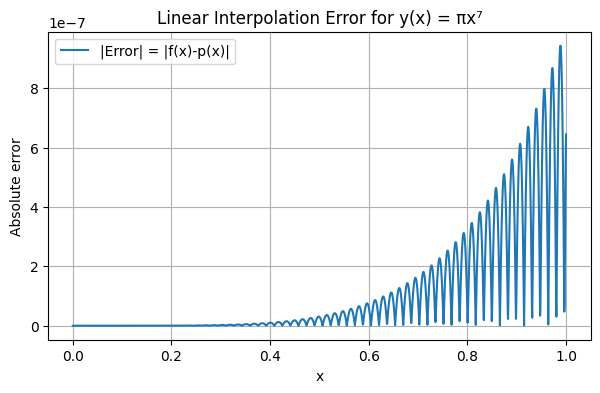

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# Define function and parameters
# -------------------------------------------------------------
f = lambda x: np.pi * x**7          # function
a, b = 0, 1                         # interval
epsilon = 1e-6                      # desired error tolerance

# compute theoretical M2 = max|f''(x)| = 42π * |x|^5 max at x=b
M2 = 42 * np.pi * b**5

# theoretical required step size
d_required = np.sqrt(8 * epsilon / M2)

# choose step size slightly larger to test actual error
d = d_required
print(f"Theoretical step size d ≤ {d_required:.6e}")

# -------------------------------------------------------------
# Build linear interpolation points
# -------------------------------------------------------------
x_nodes = np.arange(a, b + d, d) # step size d
y_nodes = f(x_nodes)

# -------------------------------------------------------------
# Evaluate function and linear interpolation on fine grid
# -------------------------------------------------------------
x_fine = np.linspace(a, b, 2001)
y_true = f(x_fine)
y_interp = np.interp(x_fine, x_nodes, y_nodes)  # linear interpolation

# -------------------------------------------------------------
# Compute absolute error
# -------------------------------------------------------------
abs_error = np.abs(y_true - y_interp)
max_error = np.max(abs_error)
x_at_max = x_fine[np.argmax(abs_error)]

# -------------------------------------------------------------
# Print results
# -------------------------------------------------------------
print("--------------------------------------------------")
print(f"Interval: [{a}, {b}]")
print(f"Max |f(x)-p(x)| = {max_error:.6e} at x = {x_at_max:.4f}")
print(f"Theoretical bound = {(M2 * d**2 / 8):.6e}")
print("--------------------------------------------------")

# -------------------------------------------------------------
# Plot error
# -------------------------------------------------------------
plt.figure(figsize=(7,4))
plt.plot(x_fine, abs_error, label='|Error| = |f(x)-p(x)|')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.title('Linear Interpolation Error for y(x) = πx⁷')
plt.grid(True)
plt.legend()
plt.show()


----------------------------------------------------------

## Question 3
### When using Taylor polynomials to approximate $y = cos(-3 \pi x) + 3x$ over the range $x = [-0.25,0.25]$, about $x= 0$;  to what order $j$ would you need to compute the interpolating polynomial in order to keep the maximum absolute error smaller than $E_{j}(x) < 10^{-6}$?

In [16]:
target_error = 1e-6
c = 0.75 * np.pi   # = (3π * 0.25)

j = 0
while True:
    remainder = c**(j+1) / math.factorial(j+1)
    if remainder < target_error:
        break
    j += 1

print("Minimum Taylor polynomial degree j =", j)
print("Remainder bound =", remainder)


Minimum Taylor polynomial degree j = 14
Remainder bound = 2.92864971323912e-07


Text(0, 0.5, 'y')

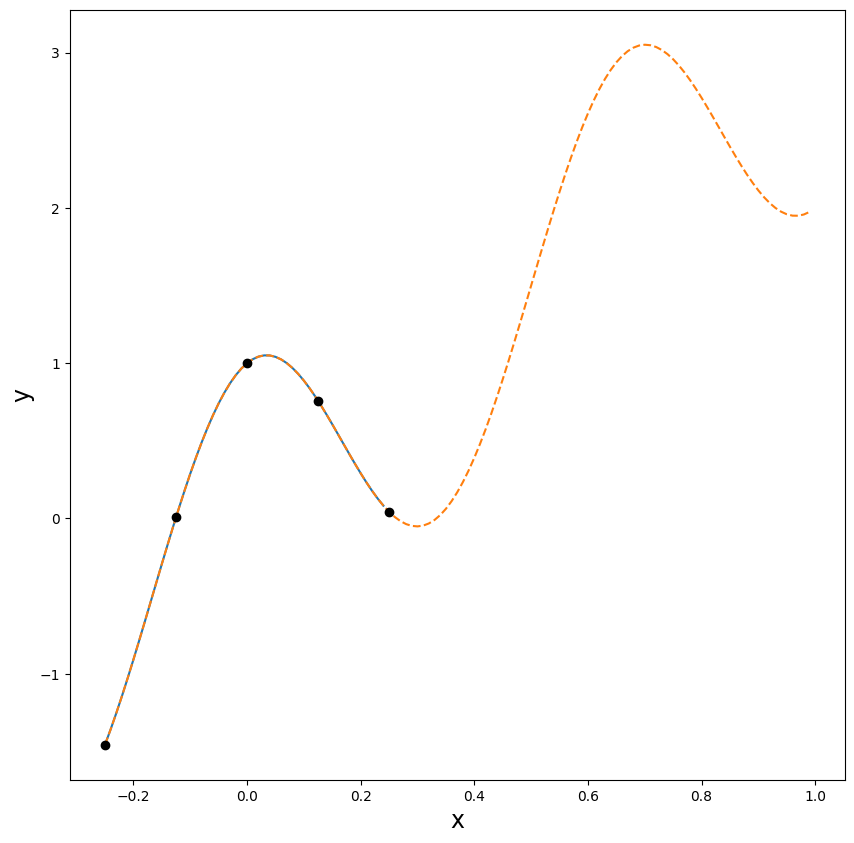

In [14]:
xi = np.arange(-0.25,1,0.01)
xdum = np.arange(-0.25,0.25,0.01)
x = np.array([-0.25,-0.125,0,0.125,0.25])
y = np.cos(-3*np.pi*x) + 3*x
ydum = np.cos(-3*np.pi*xdum) + 3*xdum
yi = np.cos(-3*np.pi*xi) + 3*xi
plt.figure(figsize=(10,10))
plt.plot(xdum,ydum)
plt.plot(xi,yi,'--')
plt.plot(x,y,'o',c='black')
plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)

----------------------------------------------------------

## Question 4
### Use bilinear interpolation to determine the value of the function $f(x,y) = z$  at the point $(x_r, y_r)$, given the below four data points $x_i, y_i$ with values $z_{i} = f(x_i,y_i)$


### a) Use your own implementation (tip: wikipedia is your friend still)
### b) Use RegularGridInterpolator from scipy

Text(0.20100250509585638, 0.5260706708519942, '($x_r,y_r)$')

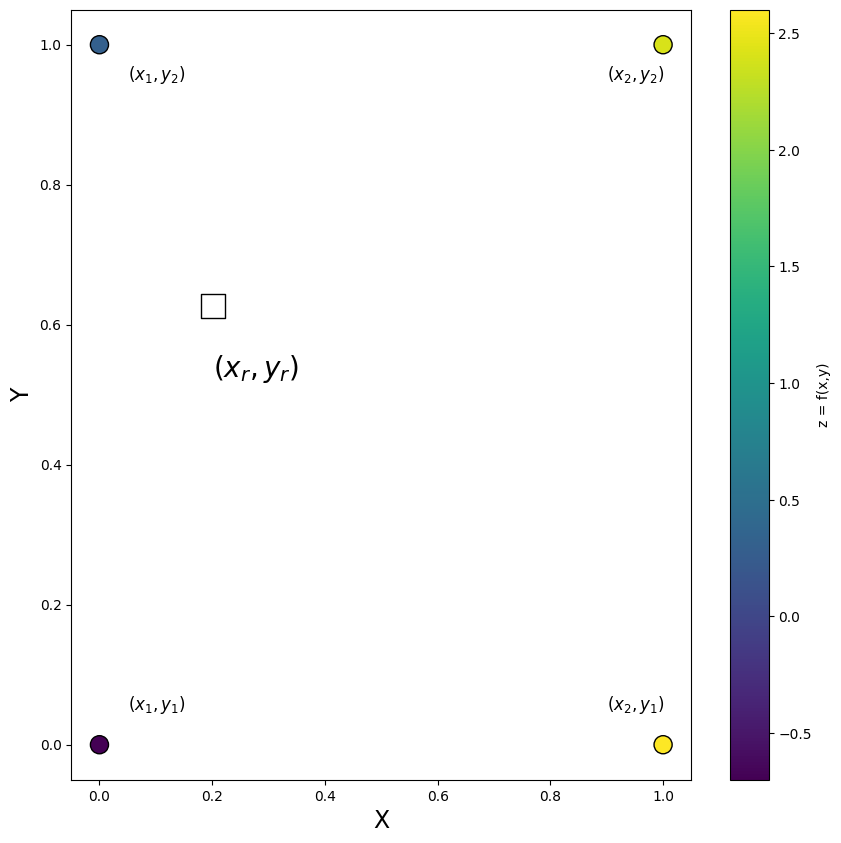

In [52]:
#Known data points and function values.  Listed clockwise from the x_1,y_1 = (0,0) point.
xi = np.array([0,0,1,1])  #x_1,x_1,x_2,x_2
yi = np.array([0,1,1,0])  #y_1,y_2,y_2,y_1
zi = np.array([-0.7,0.3,2.4,2.6])  

#Randomly generate coordinates to find function value (z = f(x,y)) at 
xr = np.random.uniform()
yr = np.random.uniform()

#Visualize
plt.figure(figsize=(10,10))
plt.scatter(xi,yi,c=zi,s=170,marker='o',edgecolor='black')
plt.colorbar(label='z = f(x,y)')
plt.xlabel('X',fontsize=17)
plt.ylabel('Y',fontsize=17)
plt.scatter(xr,yr,edgecolor='black',marker='s',s=290,c='white')
plt.text(0.05,0.05,'($x_1,y_1)$',fontsize=12)
plt.text(0.05,0.95,'($x_1,y_2)$',fontsize=12)
plt.text(0.9,0.95,'($x_2,y_2)$',fontsize=12)
plt.text(0.9,0.05,'($x_2,y_1)$',fontsize=12)
plt.text(xr,yr-0.1,'($x_r,y_r)$',fontsize=20)

In [78]:
# a)
x1, x2 = xi[0], xi[-1]
y1, y2 = yi[0], yi[1]
z11, z12, z22, z21 = zi[0], zi[1], zi[2], zi[3] # unclear what the order of z_ij actually is (11 12 21 22 or 11 12 22 21)


# Wiki: repeated linear interpolation
# x-direction
fxy1 = (x2-xr) / (x2-x1) * z11 + (xr-x1) / (x2-x1) * z21
fxy2 = (x2-xr) / (x2-x1) * z12 + (xr-x1) / (x2-x1) * z22

# y-direction
f = (y2-yr) / (y2-y1) * fxy1 + (yr-y1) / (y2-y1) * fxy2

print(f"zr = {f:.4f}")


zr = 0.4384


In [84]:
# b)
x = np.array([0,1])
y = np.array([0,1])
z = np.array([[-0.7, 0.3], [2.6, 2.4]])
RegularGridInterpolator((x, y), z)

interp = RegularGridInterpolator((x, y), z)

# Evaluate
zr = interp([[xr, yr]])[0]
print(f"zr = {zr:.4f}")

zr = 0.4384
